In [1]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

<ipython-input-3-298d45a39a38>:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(dataset_url, sep=';', parse_dates={'datetime': ['Date', 'Time']},
<ipython-input-3-298d45a39a38>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(dataset_url, sep=';', parse_dates={'datetime': ['Date', 'Time']},
<ipython-input-3-298d45a39a38>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(dataset_url, sep=';', parse_dates={'datetime': ['Date', 'Time']},
<ipython-input-3-298d45a39a38>:9: Futur

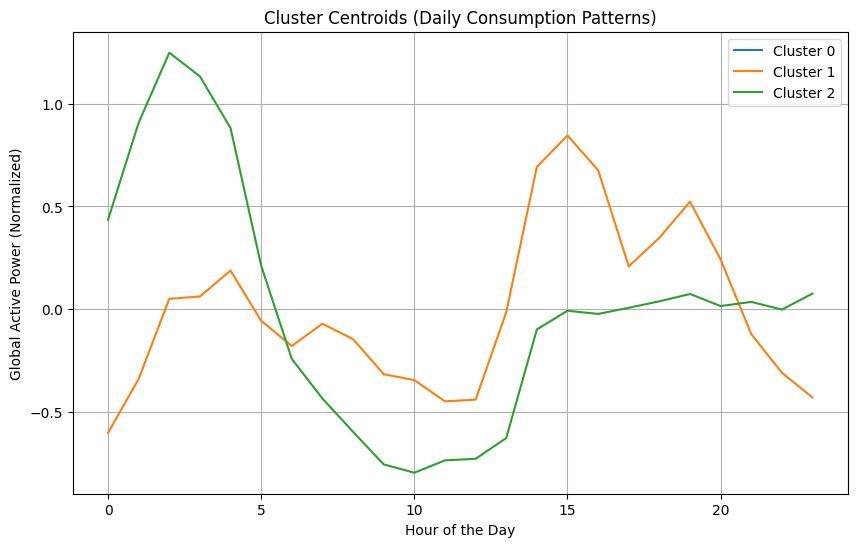

In [3]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
data = pd.read_csv(dataset_url, sep=';', parse_dates={'datetime': ['Date', 'Time']},
                   infer_datetime_format=True, na_values=['?'], low_memory=False)

data = data[['datetime', 'Global_active_power']].dropna()
data['Global_active_power'] = data['Global_active_power'].astype(float)

data.set_index('datetime', inplace=True)
data_hourly = data['Global_active_power'].resample('H').mean()

time_series = []
window_size = 24
for i in range(0, len(data_hourly) - window_size, window_size):
    time_series.append(data_hourly.iloc[i:i+window_size].values)

time_series = np.array(time_series)

scaler = TimeSeriesScalerMeanVariance()
time_series_scaled = scaler.fit_transform(time_series)



kmeans = TimeSeriesKMeans(n_clusters=3, metric="euclidean", random_state=42)
labels = kmeans.fit_predict(time_series_scaled)


plt.figure(figsize=(10, 6))
for cluster_idx in range(kmeans.n_clusters):
    plt.plot(kmeans.cluster_centers_[cluster_idx].ravel(), label=f'Cluster {cluster_idx}')
plt.title("Cluster Centroids (Daily Consumption Patterns)")
plt.xlabel("Hour of the Day")
plt.ylabel("Global Active Power (Normalized)")
plt.legend()
plt.grid()
plt.show()

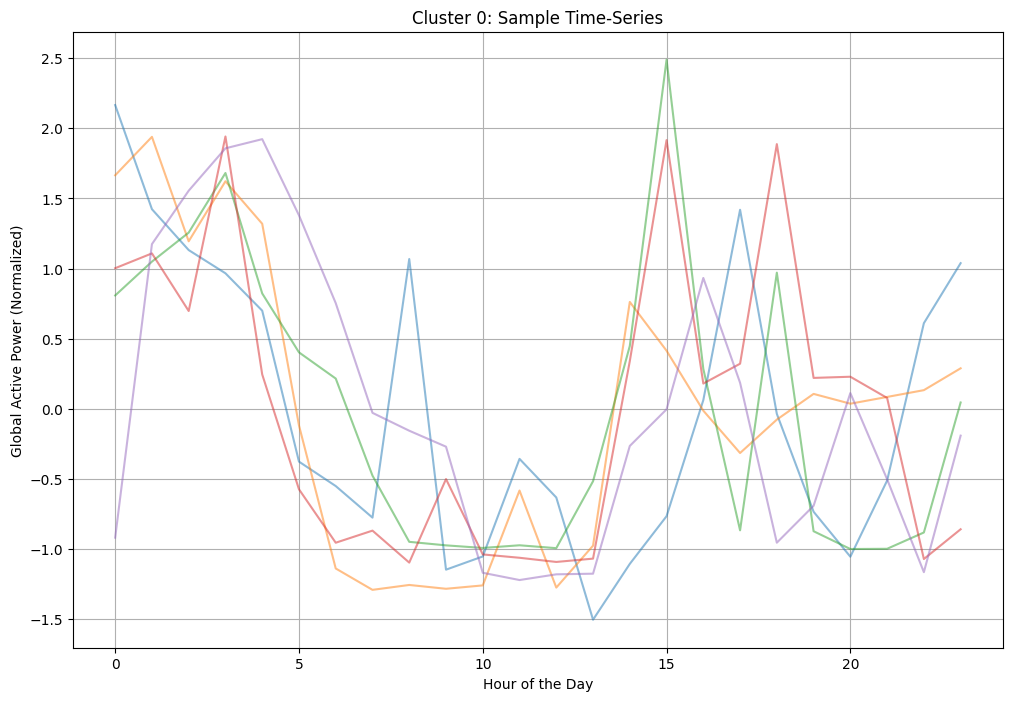

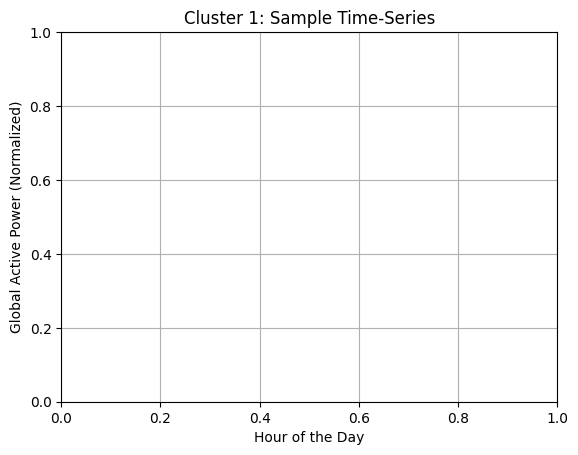

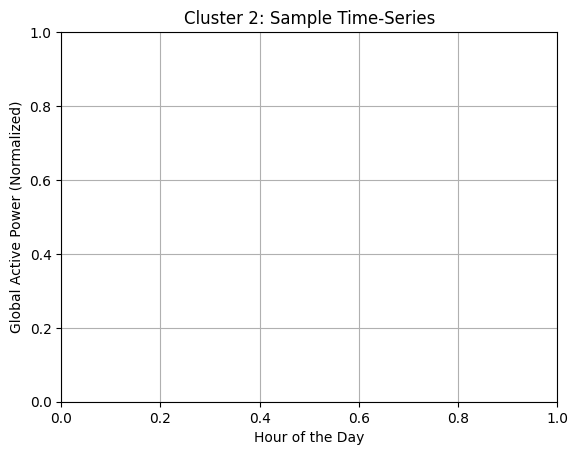

In [4]:
plt.figure(figsize=(12, 8))
for cluster_idx in range(kmeans.n_clusters):
    cluster_samples = time_series_scaled[labels == cluster_idx]
    for sample in cluster_samples[:5]:  # Plot 5 samples from each cluster
        plt.plot(sample.ravel(), alpha=0.5)
    plt.title(f"Cluster {cluster_idx}: Sample Time-Series")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Global Active Power (Normalized)")
    plt.grid()
    plt.show()